<a href="https://colab.research.google.com/github/chaitanyamenon0902/build-from-scratch/blob/main/Linear_Regression_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR REGRESSION:

Y= wX+ b

X: input

w: weight

b: bias

Y: output

GRADIENT DESCENT:

Optimization ALgorithm used for minimizing the loss funciton in various mahcine learning algorithms. Used for updating the paramenters of learning model.

w=w-(p)dw
b=b- (p)db

LEARNING RATE:

Tuning parameter in optimization algorithm that determines the step size at each iteration while moving toward a minimum loss function.

In [ ]:
#only numpy required for this model
import numpy as np

WHY SELF?
SELF is reference to instance of a class.
allows accessing the attributes and methods of class within its own method.



In [ ]:
class Linear_Regression():

  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations
    #parameters initiated

  def fit(self, X , Y ):
    #number of training examples(m) and number of features(n)

    self.m,self.n = X.shape  #number of rows and columns in data
    #iniating internal parameters

    self.w= np.zeros(self.n) #creates 0 array of size n
    self.b=0 #giving only one value, as bias can be only one but multiple weights are possible.
    self.X=X
    self.Y=Y

    #Gradient Descent

    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self,):

    Y_prediction= self.predict(self.X)

    #calculate gradient:
    dw= -(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
    db =-2*np.sum(self.Y-Y_prediction)/self.m

    #update weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db




  def predict(self,X):
    return X.dot(self.w)+self.b


USING OUR MODEL FOR REGRESSION:

1) Set Learning rate and number of iterations manuaaly, set random random weight and random value. we have put it as 0

2) Find y prediciton value for given x for corresponding weights and bias

3) Check loss function for these parameters

4) Update parameter using Graident descent

5)Step 3,4,5 until we get minimum loss function



In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

DATA PREPROCESSING

In [ ]:
salary_data = pd.read_csv('/content/salary_data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
#number of rowas and column, to find X and Y
#Tuple, no need for paranthesis
salary_data.shape

(30, 2)

In [ ]:
#check missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
X=salary_data.iloc[:, :-1].values
Y=salary_data.iloc[:, -1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
#Splitting data to training and test data

X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [44]:
model=Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [45]:
model.fit(X_train,Y_train)

In [46]:
#print paramter values
print('Weight=', model.w[0])
print('Bias=',model.b)

Weight= 9418.852312195222
Bias= 26195.843133317747


y=9418(x)+26195

In [47]:
test_data_prediction=model.predict(X_test)

In [48]:
print(test_data_prediction)

[ 72348.21946307  53510.51483868 100604.77639966 115674.94009917
  81767.07177527  68580.6785382 ]


VISUALIZE THE PREDICTING VALUES AND ACTUAL VALUES

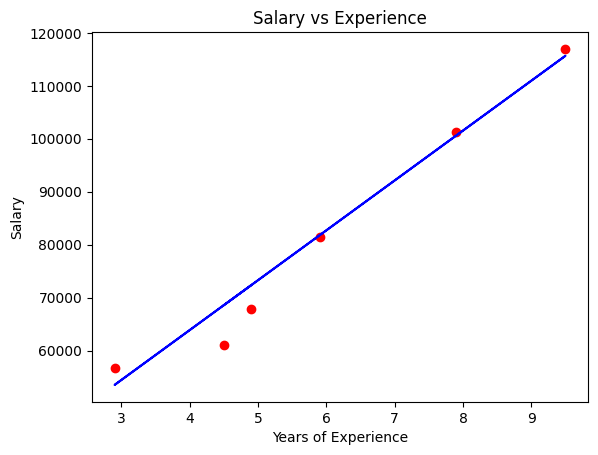

In [49]:
plt.scatter(X_test, Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

In [51]:
mse = mean_squared_error(Y_test, test_data_prediction)
print("Mean Squared Error:", mse)

#Using different hyperparameters brings changes to the eman squared erroe.
#Lower MSE refers to the mdoel's preiciton being closer to their actual values

Mean Squared Error: 14562719.711230462
